In [2]:
# Import pustaka
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS, add_constant
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset California Housing
california = fetch_california_housing(as_frame=True)
X = california.data  # Fitur independen
y = california.target  # Variabel target (harga rumah)

# Tampilkan data singkat
print(X.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [4]:
# Pisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data test
y_pred = model.predict(X_test)

In [6]:
# Evaluasi Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

MAE: 0.53
MSE: 0.56
RMSE: 0.75
R-squared: 0.58


In [7]:
# Analisis multikolinearitas dengan Variance Inflation Factor (VIF)
X_with_const = add_constant(X_train)  # Tambahkan konstanta untuk VIF
vif_data = pd.DataFrame({
    "Variable": X_with_const.columns,
    "VIF": [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]
})
print("\nVariance Inflation Factor (VIF):")
print(vif_data)


Variance Inflation Factor (VIF):
     Variable           VIF
0       const  16901.024982
1      MedInc      2.539815
2    HouseAge      1.237337
3    AveRooms      7.917240
4   AveBedrms      6.609200
5  Population      1.134824
6    AveOccup      1.009733
7    Latitude      9.206134
8   Longitude      8.875984


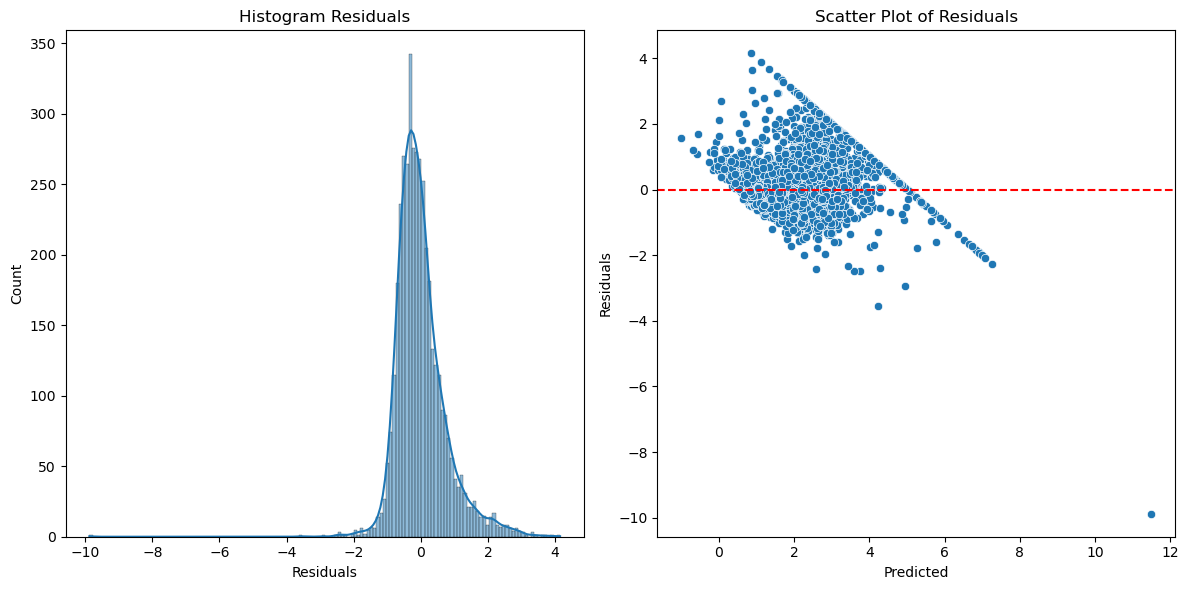

In [8]:
# Residual Analysis
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title("Histogram Residuals")
plt.xlabel("Residuals")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Scatter Plot of Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [9]:
# Uji asumsi residual normalitas
from scipy.stats import shapiro
shapiro_test = shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic: {shapiro_test.statistic:.3f}, p-value: {shapiro_test.pvalue:.3f}")


Shapiro-Wilk Test for Normality:
Statistic: 0.902, p-value: 0.000


In [10]:
# Cross-validation untuk validasi performa
cv_scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print("\nCross-Validation R-squared scores:")
print(cv_scores)
print(f"Mean CV R-squared: {np.mean(cv_scores):.2f}")


Cross-Validation R-squared scores:
[0.54866323 0.46820691 0.55078434 0.53698703 0.66051406]
Mean CV R-squared: 0.55
